In [182]:
from PIL import Image, ImageDraw
import numpy as np
import math
import matplotlib.pyplot as plt

In [183]:
FS=0.00366772681*100
F=[FS/5, FS/3, FS/2, FS, 1.41*FS, 2*FS, 3*FS]
FUNCTION_SDVIG_FAZY=math.pi/2
# FUNCTION_SDVIG_FAZY=0


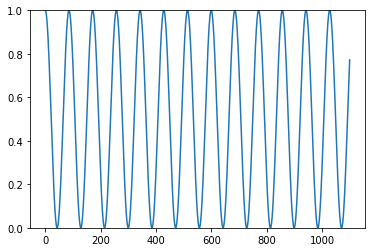

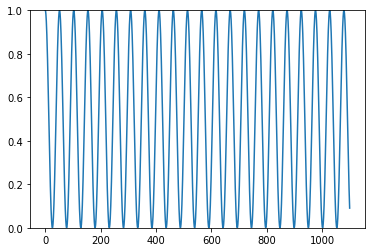

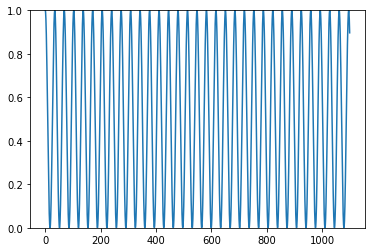

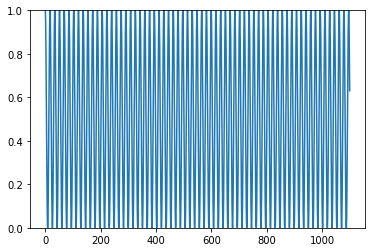

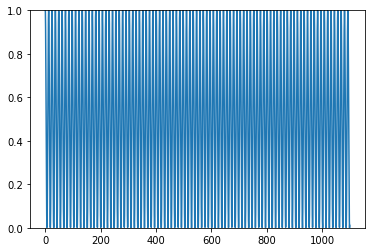

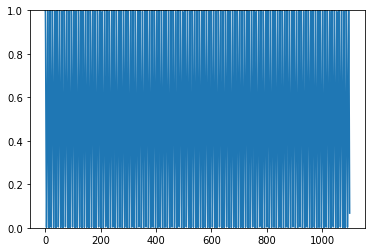

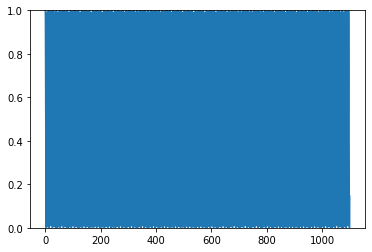

In [184]:
def a(x, chastota): # функция синуса
    return(0.5*np.sin(x*chastota+FUNCTION_SDVIG_FAZY)+0.5)

def b(chastota): # функция дискретизации
    sas=np.array([])
    for i in np.arange(0,FS*3000,FS):
        sas=np.append(sas,a(i, chastota))
        # print(i)
    return sas

def draw(chastota):# вывод графика функции
    x=np.arange(0,FS*3000,FS)
    plt.plot(x,a(x, chastota))
    # plt.xlim(0,300)
    plt.ylim(0,1)
    plt.show()

for i in F:
    draw(i)
# b(F[6])

In [188]:
def shrek(mas):
    mas=mas.tolist()
    sas=8
    result=[]
    for i in range(len(mas))[::sas]:
        if(i<len(mas)-sas):
            average=(mas[i]+mas[i+1]+mas[i+2])/sas
            result.append(average)
            print(f"{mas[i]}, {mas[i+1]}, {mas[i+2]}, {average}")
    return result


def c(filename, values): # создание изображения по дискретизированной функции
    size=len(values)
    img = Image.new('L', (size,size), color = 'black')
    d = ImageDraw.Draw(img)
    for x in range(size-1):
        top=(x, 0)
        bottom=(x, size)
        line_color=round(values[x]*255)
        d.line([top, bottom], fill=line_color, width=1)
    
    img.save(filename)

fiona=1
# for i in F:
#     c(f"{fiona}.jpg", shrek(b(i)))
#     fiona+=1
for i in F:
    c(f"{fiona}_sdvig.jpg", shrek(b(i)))
    fiona+=1

print(b(F[6])[0:20])

1.0, 0.9998190486938535, 0.9992763257489149, 0.37488692180534605, 2.9990953744427684
0.9884630598430264, 0.9854135386229343, 0.9820126725475022, 0.3694861588766829, 2.955889271013463
0.954384643324848, 0.9486072807661048, 0.9425052139137556, 0.35568714225058856, 2.8454971380047085
0.8993373930535231, 0.8910988015005501, 0.8825771305917218, 0.33412666564322435, 2.673013325145795
0.8258616163577971, 0.8155419883614918, 0.8049939694254347, 0.30579969676809043, 2.4463975741447235
0.7373480557925726, 0.7254236190754778, 0.713336019565151, 0.2720134618041502, 2.1761076944332016
0.6378814139631362, 0.6249024545764946, 0.6118330901406671, 0.23432711983503723, 1.8746169586802979
0.5320518536470935, 0.518617321501879, 0.5051693140420939, 0.1944798111488833, 1.5558384891910664
0.42474317206126444, 0.41147304073106217, 0.3982669856764957, 0.15431039980860278, 1.2344831984688223
0.3209074245567668, 0.30841408088570366, 0.2960594081038528, 0.1156726141932904, 0.9253809135463232
0.22533639835405656, 